# Exploration of preprocess possibility

In [1]:
import skimage as ski
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

## 2D - on mean image

### visual exploration

In [33]:
def image_processing_2D_showcase(tomo_id):
    tomo_mean = img.imread(f'../data/pictures_process/mean_image/image_moyenne_tomo_{tomo_id}.jpg')

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    axes[0, 0].imshow(tomo_mean, cmap='gray')
    axes[0, 0].set_title('mean image')

    p2, p98 = np.percentile(tomo_mean, (2, 98))
    img_rescaled = ski.exposure.rescale_intensity(tomo_mean, in_range=(p2, p98))
    axes[0, 1].imshow(img_rescaled, cmap='gray')
    axes[0, 1].set_title('Contrast stretching')

    img_equalized = ski.exposure.equalize_hist(tomo_mean)
    axes[0, 2].imshow(img_equalized, cmap='gray')
    axes[0, 2].set_title('Histogram equalization')

    clip_sizes = [0.1, 0.5, 1]
    for i, clip_size in enumerate(clip_sizes):
        img_adapt_equalized = ski.exposure.equalize_adapthist(tomo_mean, clip_limit=clip_size)
        axes[1, i].imshow(img_adapt_equalized, cmap='gray')
        axes[1, i].set_title(f'EqAdat - clip_limit={clip_size}')

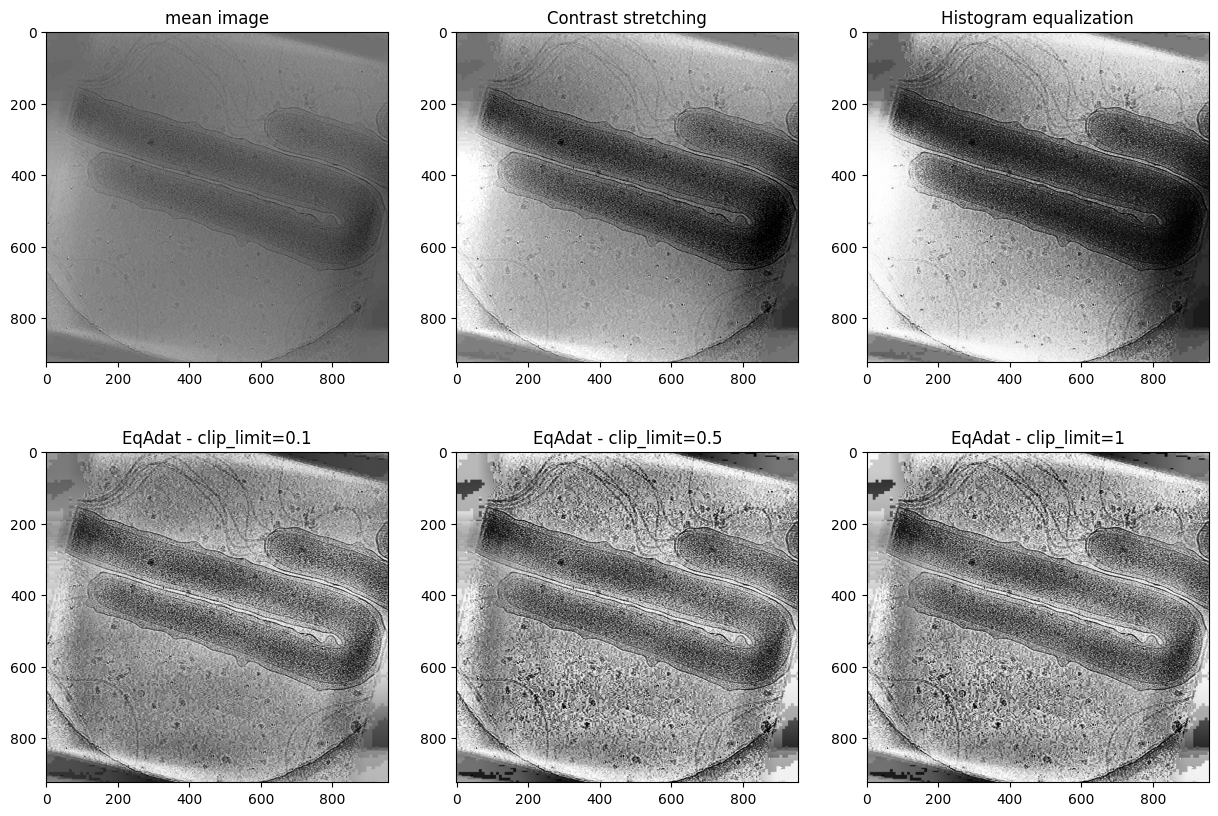

In [34]:
image_processing_2D_showcase('00e463')

Adapatative equalizer seems to give the best results, as it allows nice contrast in zones were the image remains too bright/too dark with other processing algorithms

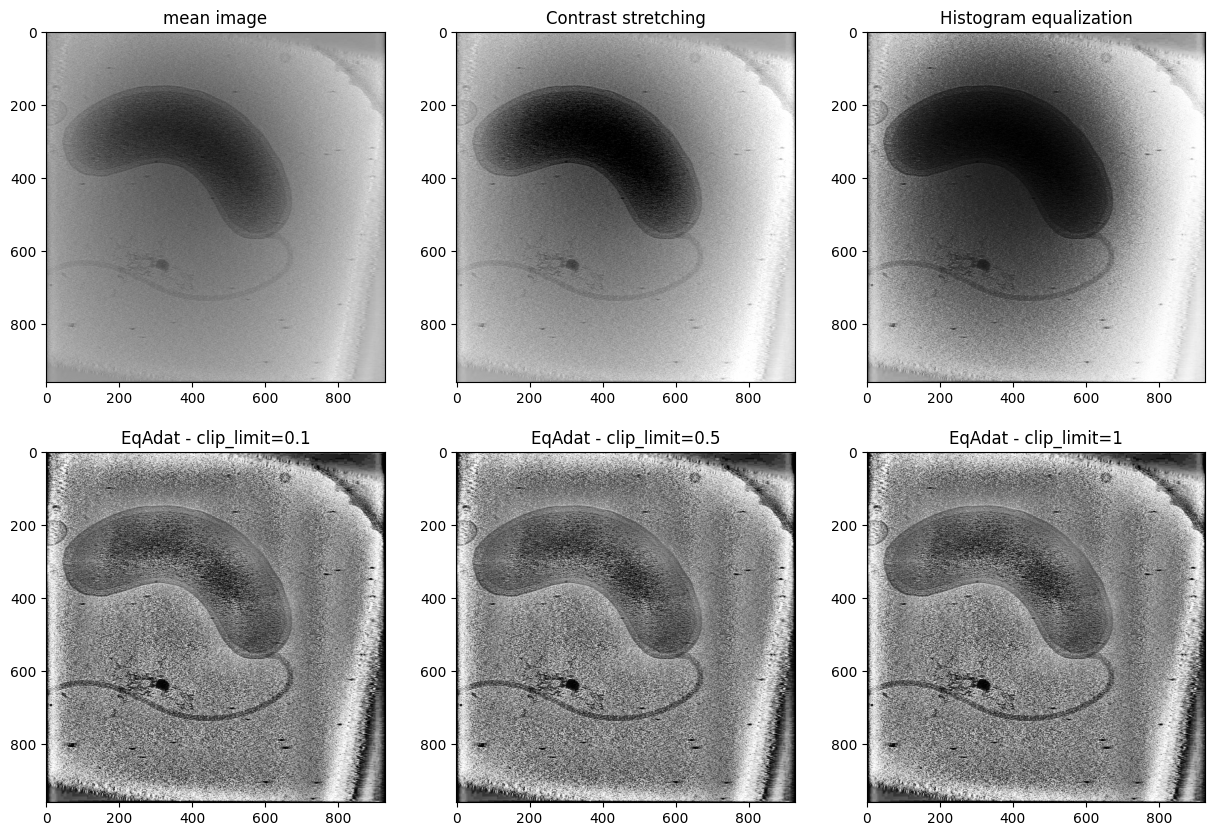

In [13]:
image_processing_2D_showcase('00e047')

### creating the processed dataset

In [ ]:
import os
from PIL import Image
import numpy as np

root_folder = '../data/pictures_process/mean_image'
clip_sizes = [0.1, 0.5, 1]

for mean_picture in os.listdir(root_folder):
    if mean_picture.endswith('.jpg'):
        tomo_id = mean_picture.split('_')[-1].split('.')[0] #mettre un regex ?
        for clip_size in clip_sizes:
            tomo_mean = img.imread(os.path.join(root_folder, mean_picture))
            adapt_equalized_picture = ski.exposure.equalize_adapthist(tomo_mean, clip_limit=clip_size)
            adapt_equalized_uint8 = (adapt_equalized_picture * 255).astype(np.uint8)

            im = Image.fromarray(adapt_equalized_uint8)

            safe_clip = str(clip_size).replace('.', '')

            im.save(f'../data/pictures_process/adapt_equalized_{safe_clip}/{tomo_id}.jpg')

# 3D